# Users and Mentions grouped bar charts  - Fake Covid-19 dataset

We've used the following packages:

In [1]:
import pandas as pd
import numpy as np
import json
import sys
import string
import re
import itertools  
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import emoji
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
import nltk
from PIL import Image
import altair as alt
import csv
import itertools

In order to do the classification of the tweets, we need to read the csv file and the json file:

In [2]:
csv_dataframe = pd.read_csv('dataset/FINAL_fakecovid_final_filtered_dataset_clean.csv',sep=";")
csv_dataframe['tweet_id'] = csv_dataframe['tweet_id'].astype(str)
csv_list = csv_dataframe.values.tolist()
lista_unica_csv=list(itertools.chain.from_iterable(csv_list))

data = []
with open('dataset/fakecovid_result_final_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

In this notebook we are going to visualize the users that have created the tweets and the usersname mentioned in the tweets. Every bar chart here is stacked because we're going to classify every tweet with a category (False or Partially False), according to the dataset.

In [3]:
index=0
cmt_list = []
#stopwords = set(STOPWORDS) 
for element in data:
    token_id = data[index]['id_str']
    indice_csv = lista_unica_csv.index(token_id)
    token = data[index]['user']['screen_name']
    final_token = token + " " +lista_unica_csv[indice_csv+1].lower().replace(" ", "")
    cmt_list.append(final_token)
    index=index+1

In [4]:
index_mentions=0
cmt_list_mentions = []
for element in data:
    token_id_mentions = data[index_mentions]['id_str']
    indice_csv_mentions = lista_unica_csv.index(token_id_mentions)
    for entity in data[index_mentions]['entities']['user_mentions']:
        token_mentions=entity['screen_name']
        final_token_mentions = token_mentions + " " +lista_unica_csv[indice_csv_mentions+1].lower().replace(" ", "")
        cmt_list_mentions.append(final_token_mentions)
    index_mentions=index_mentions+1

## Users

We create the pandas DataFrame and then we work on it in order to create a better bar chart:

In [5]:
fdist = dict(nltk.FreqDist(cmt_list))
df = pd.DataFrame.from_dict(fdist, orient='index').reset_index()
df = df.rename(columns={'index':'Usernames', 0:'count'})
col_one_list = df['Usernames'].tolist()
col_two_list = df['count'].tolist()

typelist=[]
namelist=[]

index = 0

count_false = [0] * len(col_one_list)
count_part = [0] * len(col_one_list)

for el in col_one_list:
    tok = el.split()
    namelist.append(tok[0])
    #typelist.append(tok[1])
    if tok[0] in namelist:
        indx = namelist.index(tok[0])
        if tok[1] == "false":
            count_false[indx] = col_two_list[index]
        elif tok[1] == "partiallyfalse":
            count_part[indx] = col_two_list[index]
        else:
            print("errore count")
   
    index = index + 1


df['Usernames']=namelist
df['False']=count_false
df['Partially False']=count_part
del df['count'] #clean column
df['count'] = df['False'] + df['Partially False']

#print(df.to_string())
#df['type']=typelist

#df = df.sort_values(by=['count'],ascending=[False])

We visualize users with the most number of tweets created, we have filtered in the range of a minum of 5 tweets to a maxium to 35 tweets total (which is the maxium number of tweets created by a user in the dataset). Every bar is colored basing on the amount of tweet written per each category (False, Partually False).
We have used Vega to plot this chart and not Altair, to get the data in a good looking way (already indented) and ready for the Vega Editor we have used Altair to get them. (Plot the chart => view source => clean the source and copy paste on Vega).
**We know this isn't the most efficient solution, let us know if you have other ideas**

In [6]:
bars = alt.Chart(df).transform_fold(
    ['False', 'Partially False'],
).mark_bar().encode(
    x=alt.X('key:N',title=None),
    y=alt.Y('value:Q',title='Tweet count'),
    color=alt.Color('key:N',scale=alt.Scale(range=['#903C7C','#BDBD3F']),title="Category"),
    column=alt.Column('Usernames:N'),
    tooltip=[
        alt.Tooltip('key:N', title='Tweet Type'),
        alt.Tooltip('Usernames:N', title='Username'),
        alt.Tooltip('value:Q', title='Tweet count')
    ]
).transform_filter(
    alt.FieldRangePredicate(field='count', range=[7, 35])
).properties(
    title="The users with the highest number of tweets created classified by category (False, Partually False)",
    width=95
).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    titleFontSize=15,
    labelFontSize=13,
    titlePadding=10
).configure_header(
    labelFontSize=14,
    titleFontSize=16
)

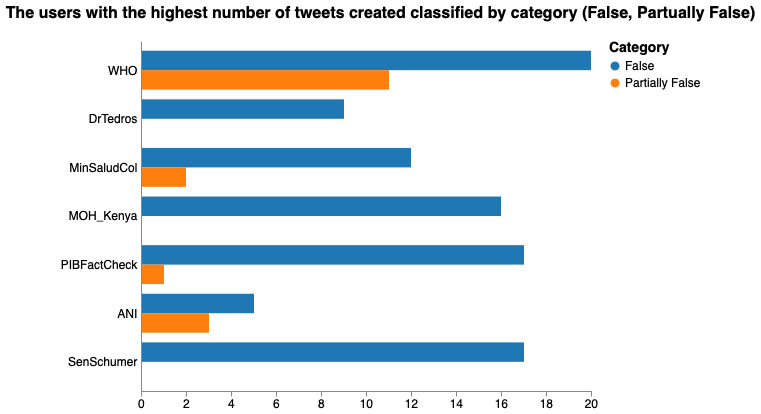

### [Open the Chart in the Vega Editor](https://vega.github.io/editor/#/url/vega/N4IgJAzgxgFgpgWwIYgFwhgF0wBwqgegIDc4BzJAOjIEtMYBXAI0poHsDp5kTykSArJQBWENgDsQAGhAATONABONHJnaT0AFXgACBhDiKIOgO50YO+nB0waZeBEw7xDBE0M62AM0sm4cTGMoRTgkTDhZHSgAGyQICBovGgidJgBPKLDyNkUMgAoAMSRogykdAAUkRUwGYuiMopK4AEppEDNZejQAFgEABhl4Oyw0AGZ+mRwkWVkacTI0ARk1TGi4NFBwgA9MNBBta31DYzN6S11bewUnFzcPb19-QKiQrMiYuISklPTM8LIcvlGqUKlUanUGsUDK0ZF4JJgAMo0ABe61QAEYAGwybxeAy7VAAJj6AF8ZLIwihUABtUDiJAINEgTBIJhrNrEYoMBRoWkgACqBkU9MZED2AHUABIAeTawLRxJklWqNAhOnlaHR6JkUDYDHEBNG6LJoEFhhFPPQABFFJoIoo2GKZBrUABOJVg1XRerqqFogYgXX6gmuk0CoUWsXoZSwKqycRweCKOV+tAB5VqNUu7WBvUGzVhs3ChmWkAAYQAQgiAPqSwzKWRkdbO1MYj0qrOtgNB-MYwsRktRkCjRkRasJkxOkDZ9uZ72QpqanV5gmE-vmwd7ACyDBgDOQsgAMjRYinF22QBmvT6Xd2VwWpKaB6K9gBJKBIGDiLcrpH0mhngYS6Xp6nbnnewYPk+G4vugFYntEADiWRTjOIEdvOvrgcukF9o+4YwaWmBGFM1RpBI0RzM206tjmV5gUBqAQb2xr4UWkZvqMfQIAA1gBLbnnRoGYbeOEseuxawSAEBMEg3KKAAguUgEKrO14LoxzGrhJHHoAAouUtiUTgOBwNWh6SipwH0SJXZiQSrHQZJpZmMiVRINWSBeGkYTIlZRJqQx-r2Wga5sc+RGKMQihMP5hKBbZgkhagow6Zu6DINEsyYGwTAMNEbD+UJGE3nZua4Y5BHOUOVhJEYajiLMKACYxxVzqV2HleJ4WEUOW5VHMsjKGQ3J+S1aJtepWGacllXselICvuIdUIMkih9H0RUJR1M1dQ5aVSWWAByFZlv56bCTtE2zQdpZStKCkFAASrK42LNtGnBXtiy3UOR3DKsVFxR901fT22k9dVewAFIMMIDBlnu8wKadW3oe1n1pjdkO6ZezCUVA1ZlnQKJwJIb0XjZV1Y99eFObjCn0vYSAKbGuTNTRSXo1Nom03NEVDgi5AMIoSDiB+CLKRT8Xc0FNPg6Fv17OUW56ZLwOy4lu0K0SSvoApZajJim0U5NcsXjrYX0wtiAnmZyCKMibDRF4aNU5jTHY9bUn6Kt8TqAwFCNRzvPu6DwE6-zvV7Ai0oIluESqhAFZWq+buXR7WlQVVuMANJizxbDVtDODk5zu1hy6MuW3r+w0KKR1sCY6clR7OY1zjC0QEgsBzNWcxQOdINoZHtcFIeT00Ak8wa5XZUd97pYFGwOVkKLcKIfo6JD5r1MW-edM5wtOA5FAKjOyTZ8txj4ee3ztcQLYxDVo-SA8Wo-Hl9du+Z17R9SRSGYaRqw+XEDxfw18ebzwPlHKG6BxA+QPBISB5ss6H3mlJe6O856dR1qSTuUk4i2EfjxYQe4UFazBjA2uCBORgMMDxGAbBSD+VGMPaBuFUoENLFaKeoQDB6V1AVMgaQKF72rgfLhi8hxDQpMQGgshu4Hk-mhHB2tqHcKHMIJANAYrOzEPSB0-lsQ-1vu3A+AB2MeG5xAAEUGC6MdBWBSYjf7300XsCcEBkBbFcWY5KVt-6lnKK+Cs1ZN4mE-GEFRrY2GmN5jrKRQShy0GiFABgxF65+ISRo6RytRbyDgDgI6AQ9zdGyRw7qeT0AQDXrYRqqpsEZ38e46pgY1gn1FmoCpuDcnJL2BABgshbCKB4qLYQPT1EVVrmYaI4DFBkGIJMqh0yPHoHsXMcIsRJ4fkULIQqpt2G9NWW04oXhDDyDGl-MYRypm9iSRg0sxBznREyU01uLTR5rOZJk2AcBYD6GWfLPpjyhwViOuUMJS19kJgSCHWitzv4L36egKETD9B7hgECu+Xy2niD1KLWIcwtQWOxWg2BuN+qzD3ApJgCiFKUTJX-UFexhBsBoFARMnw4DRGQOIMuqjmk5JOSikA-0hFwDCVuK0TLWmitqNkJZFMLofKrgE2u-IWQwCtOUBEsrcWiqmGyR0-ze76pBQLPYFJxDJGiCrPST1obvJvi6boyVui1wAFrMLCDlAQAhZ5CsqRDNpRQmAVjqANG15qRUsvQAUGgmgLFbFzuiV8FiETiEQjQCshJnVQK5gauNIAHY8TWGYbxsgY1VNFQyYoqoxZDWmGZfN5tzGxstfGqo-gIDVlJcqxFEcLXRzgnuLp8EV7-KxYc+Jwbs7FuhjkJsr46HSggDgOY8KuZqJWTW4tupxbsH0LCiAFiz3Vv2t82GYtKgXygGagds7C3DrgSALccwERclkGWZ2RUZY7tCrND13yywKCqJUWAEgFJrwOdcu+AH94dpHSAFeSB5FF1FuINy0bH0IfbXuztYrxTlCeiLYoZZlCMlbZQwDtNAnFoOAANWSM3GdCHyW10RsoRwbBDKiyFBe+dhGyB8rgJOQT6DCOviOgiH9BU3CNOloOnFB96OEemJyJgxD4A8SYMIHAEmKULWEPs5QSBhDJgpiY9jyVMS1xGlkTKHlGw92o3vfDl62lWgUDATe2iumGdrq+K0xJiRubbsywj3dxCcmiACQL3z3DiG0atZa9YxYJa8wADQrAnJq0ovBJE5Zl2t0QcB7jZV+Yo5WkDbzY0G45BHkNFEUMgMmXgRb-IUVuiuDXWqReQ1AOlhNBqKbg2bGjKmkOvsqAwfqLJYgGfq6qudknkOUQ8iyeQ8RqJqqfXckNorDx6m8wUB0ZAFjLZdatozUlyj8jLHpasgjaimZK8W8QMAeLjjE6hBF+3d2edFRG6IelZAIH1Ps97hGeJiBin97dfXAdCeQ3AVwVQz5sBLDGWDgqVuNaB8WhS1RGCKHFHATZ0PkN6S3GWBSh5XzeA5V6Knr7eGwu1QiPUbl-JuoB8C3CwG2lc-K8kas4oTwviuwWg7KPX05VoWLNeyRwECv+zZuVxaT44Hyt2hH-X+dTaa6++nr4yyvgUg6hSnrXrjeUx5xW3zyhWklGQXY0u23qu+QYnISBXSYldOFz5L7cYVh5bysWcAACOtQ1DINw0jod03KXSklNWXOZMfJFWs4no3Dk7MgYYB+Ggskg8jxDwtQ8uuCvM+KKz3GCIntPXM2wHlm7-JLEN2ggQtd4Zi28eYYonJFB1bt13gbr7oaHi3JoTEAaPeTY498hljJuvlHKNWevC0ucIEdIhPSR1A349l7rJ3Fy7DyTYAiV85Q9JLbHxrotUWxbdcbLlYxym0EF7ac3mPPKKyxDQBsBPRb5STXrfhizIgizSi5ygGlgIDrolDVhMCzCsKf7JQPKEaIz1KyCRKizlAXyj547XYE5y64yTyOjVhHQ9yJBwFDhLQJDyCIQSA8gL57xL7C5frOJSwP654cGipMxIASAnwEy7atj-p8Fe5tKMaxAUhliIRl7-ZP7IY-r4qKCHgMhMDlAuJsFuLKGvpMzIDVi76iyKDCAxKI7H7I5ravq6ghAGhzDuCxjyB0F7CaBsAICaCJBeBixpDihpwJ5WFJ7G64x4h9BQDohGiiIUxxKP6SK1yxDiyhDegZaBEkGMQSK4RqbIYIgx66JwDLyKAACaeorh6Ah4ZYPBxBMu1ht2pYdO5uBQm8jmxQPW38cRyeC0CkCIsQ8i2AZRYqK8teEAZY7kQiaB4+tMmByG76CYWwiE7ucGKq6RSKFeUk+cI0LIO4BgpAOGvBQReeZBC0-0ZAYORe0S8e+xKxAuIRC0ekbg5m0wSAek66iEmgOhSx9uE+uMqo4gvao2bRtGHRvY2Rr6JSk4WWAx4JEACc4Qig1YS0Ax5Q9h3cP6EONqLIlmVxNRNxhOhGVozs9Q8EjUosAx-hZYMoZY0o0ot+IBuht8-Bxa0QtQ9IxAzs+K8isAihz6nRUkXheBNA+c9SAxn6jU-gOAfQ3QlYeq9JwqtxUkP4e4jIsgFYeoVQ6QAx0MBQNilyNq+K2KDup+bSyIcwzAAxxE-epEZMZ8PcuO6ukhmuUW9cEgj8ZM1YZABU+uX0eG3xC0a8AQfy4gJgtgmAjIWJ1RqCvpCpH6X6cm3JJ++CbSdKUw4sTCAxJhQc1YXgIQiAqRcGEhBxaCoJuMjGck9g4gkoCEPkeymp5QAQhgFYIsTY4ZsS6BUxtc-eMAUwxEPESAVQ6ZIQpESADm0R2JkZjpKhVoZYAISqcGsRDpiStcISFYRQUAmAiM-yPERUFiXxfMAAHLXHMHCDgCEIwdaWNntsCYdsWsdo1BIBWDmVWrKTdrXNKNsoSWTAMXEIXA7A1AMWWJoNWGHgso4A6AgEftcYhvch2V4DgNmQMVaMwDogQaIZKLYgMbsmsAYOIDGAMdEDAHyvINgICZTAuWsaWIeHAGwKWQUr2S2eePOYWRgYeYEO4FUMrt6FchGYvlGaWAyvIgYHBR3m2TrD3svsiGOtDBEBSDAMSH0KMAMQpARdMNDEgJEiqZoJZM+aQTYbjK8IYI6M2gkGQH8QMWygYEkPSKEoxluAMQZJKK+HpPQOwBuiRRNuwbxUOApEdAEXBp3ghnEjrAed8v1NUHAOUL8Q1BYb1gcYaXUTImhgosgFAL2QwGZfoA1NPFudpSfvFXsMgNgAgF4OBUppMcisWq4AgGkAgJEpRBDhBTiYcUaaKnpGkHAKWd6GTGEGwHaZYZBYyVFpigoi-AorMHkQMdFjlNWCyPML1QbleUcVJPSJBuiAIOejlbUZxmBiEJ+vevANgNFe0WRbyaWDalALIC-G5SJeRSkrUHsqqGfPItEB-mVQfN-qKlObfnEJgN5vhYddZMdfKaWJKHGOKZLCLP9fBrnnFbXAiJ1o-IjGhkjOAnhWkCNIYLFBtbiYtaWE9BIMULILnESmrn1Y1YacWcZvXFVXxAgIyM9aVQtc1cWsuYjQ0hQIoNOp8YbjDU7qEqueufAClfGdYYmaKoxgpFuHHApIxg6kugMU9EUqqUwOkKRo-PLUUqpQmPTWOTxROa+ieWhv4OIAgMYVPDAKSVjU1XlegJ+sybIK+LJq+E7Q1eOeVYRqtCkXskgORAMYxtKFlkTBIP6WIF+WKUYGwISN0KMN0L0AIJiGZQoLIEwIPJbQNchohFRX4HAJjTrR5XrbjP6hYtWEqU+bnXoTdXsKbubpbk9NbrbqHIDQSKLcWmMmAsKFsB3QMZoJ6luAYMgOYVuDxAwGlanZ5XsF4LFmsOZV6QDUxfnQtHaByjACUiUJcdxXnfobjCeTQKAr2UHMMpDe5eXSdX1GLGsH4bTsLcEXiTMcZZEhneHSTfNY3TjUOI8WkOMhDvQPWlda9SfXsEUPAIgCUfqICgzS-UzYRvyEdDqohEjL-YzdbSAELLmWWFuDKVzT6fPVJNKOg9WApNmTQH-gMa8NECYEwBIAmPRc-XPZvQtE9MdBWBQAhXEHytCWieaWwDCkMTaTPQFH-SCbXMTi4C7GwNBhlXMAoWkWTWPegLEEwqLG7lfVBTfWznwnEHAIIs7GwCIso2gs3YRjuO-D5sqNtrYCKV+t5p0uEMnHNUdbFVIaKsiXAF4HWQVCyHw0fQybIyAKqavYYlflUeIddVkbXAnDALMHpNEAmrEJROUqPdg6WBQ9EBYj5AgxA0g8waQMKIyAaE9AUMozzaGr0ewOznY7Pf1T44upKgop+TEbuTrELqKvdMRi9Lzg0wfGJW0naOdXAD+AaPWHAKOevcfUDUOPqByi46LiUJqT3DxP1C7brW7dTrMAYhoVhuk7QxXVoKLKQJRDlJHYUz4842eeLGkJ6h8ZeRAxTVJCoAECECkUc4k4LLqNgMwdgJRNndKosxvaprXJiWLJ5BSEYJzSM94889uEgFsGWHjQJtI57hC+gJvAhHJIyPyA6lORNY2rszozyn2dQ-Y5U4iyAIeHpFsCeQoDCVI2XeC3Q1JLDrJF4gMTuNUEgG5Mxr9ghYoNmvuL6hTgMXpjgLEOU6RVs--egCcxAELFAL0AMfAMUPQDOXJAMSIbXv5DuQIwSFYt8gPMyQkEHe-gk3S6WFk+aLk5gBcz86M9eYRp+vEGkLCVPIjBytlTS3Kao7jHpHkaZOiIYN5v6QK4wK-OIO6aAopdEO4NUNWJPNkyRQWUS8s6+u4WdWLDlEQfaWK2M3sGoLvvQMAiNLTemSLCyG5JEnuEwOm6Ta7ds+WLYFwzQASfSFsqeEazW4hGsPyhnvEGsGTkE1W0szWzMMUHAHuVa7S384liUKm0wmra2+KyAFqTqXAMiHqSK8sY1fo5xiTKiOIJrXAK6IHnO1mxlIHP8nAPIq62C+66-XsEdEUbJh4aoA6J1QSxUxuz46+Oex-QPGvRmwmzWzaJ6n4JRIPbYKiGO9e5A8hlaFaNCX5u5N0kex6wtAUuwHQNEjops-+-O16w4hALDI4Gq0hze+gBQ-yskKMBYoe3OSE9Bd8kdGWFOTOe05qz0LXPcbJNoqZnDV1lh++8S6MsOVULVQHpqfXJG308OfLQyBADaP4MiMM3+-x8a0OArTgIzLIGkPBBdhANbiKa85gD+IoNxhIFuH2zQ9h8eyADosoA0jok-YS8pzW3WXCQiOELsQYmSSeFaLJLIBnRhS6Rul0uoOmTQL2Y1GkPilYCVW6y+SBiarGNWPINENWJiHmsR7pQtLYHyiyHShAJEgMbMAbfEAyPLfjVlETfZ3o8lAY8hiDUkMiKpZKeiHuXua6AIPE7FzpUg9KGFRQNWAiKtF0Bl0g+jsG3RdPPYF+QgA6MYUQvWgMSXvWjN3mQ3Q48Sz5CUPAObTQOiK6HuZWzFZBUU6KgpPTluApE9E9K+MSJEU8ypzDGHiafIg5zTFgw9+gJykNBytWGux0-O1AJF+zTaahyK145B5k6yGkJRS93EAMQgjm6wV17lbXP9AfXK3gGfA842kie5O+sEGwBOnhaECSWwB+F+AaY41rjkH-uEGKYenxwi4m7jF4Q3E3NV7TLV6+lKDJmWLKyN7XOKCGXAJKHqAYPzzR9ze6rXPnIoClxoRkhjT3KC0p9W-O2sGoLwxui+1i6mcux+I4HAGyq96K5Z8h4dJLf1GOkQhaRB0ofEcvqtIoGpzkIsWt8dz4zuA8TQO+sZzkMo5kYI98h6blAq-XAoEyxTP5RA108DjkFPIul+J5wL98ttslwyBIDEFjix4zU08WvIXpGlq1oYBearwO-O1aIlbIOUNyAM4pdlD5M3sIPnPlBNTAO3yGRALIJDv4Id452r1Z1SYxsFtCRWA66ErMylQYluNF3lJvin20vAFlErzFMUGmfU6xylKj9KK+H4K0XbzpTcyaw4gmLmX+Qv6KiyOAkXrYEPatIVop-278-O8QJoOS1Hk9IxpoPyDQMIFAK+FHk65Xs4ubSY6HpHFAYNgB3XWuE23rRwAtg8gVbmVHe41tVWmvGoKMnu41sKMDAZEHjW0SHhzO-fcvlZyYCPwluCAN3mX2f5Wc9IMYdwiIUp50YYBSAE+Dxk9K9kJqEAENv2Qv7FobQopcwkwGpZQCUe3yHluLCqAFRvMk8BIFgPnafppgqoAhm5DrzgNM2NrZDJVhwq5RDAgQZeL4j4FYE2ApkYUByn0B6Q0G4oApkYOQwGwjYJsTBhAy564wEEUAOsAqxgCP8LOTnedqMVEaKAGOAxCxHuT6AS0BiPKCII6DhIDFc4aQKxjlC8Bg4WG-KaHgiAsRADqB1rEjpeAdB0VyILIAYriFry8oPw5yMQk-w9iB9DQQjb2oT2mBg9aO5vUsBWFOjakFk+gcUGigP4n4j+Q4Y7HhzrBBkeqpdUQZtW+Qu5ZMM5BgJe2CZS92y3yKYHxEcBixd8GJf3rYNfSgZQymgTDOuld4VCfBA-ZoUOAApAVDAZAUCh4Q554Ja4PKCQBDggCzDKht8QKgfDz6EZSMmnbNPlF+KQ142vgoPl5l8LFBs0iRQ+k0JyGUVk4ZGSiIb08aQjMuhCYwjylwEmkoSRRLJmWAYAeERWAIpng7zaRxCV4bAfkFQU5abDcYiNOXskAKCJEhOJvfESQM0GT4XGXgBELYCFZDN1qyPcYW0mJzww-icwewOKArAikyYopeQEYC7p7h9QZATQPqDCzqCzejuNpAnACAHBJWAxRCJRmdizBb0BUdWjgA0Ki8uGPQ6wn0KtTKBY27pKgZ1BQHztRYeoV5ElwURrRzR2NKDkmyYTiA8oygLSk4PW4fcQAtKIuJdQjzyCrO1qW1L7hN7g8QBLVbvnGDYCUU6ALaDfozWmKvposUoniC4Atq8jPRSDCXH8RyghtEKn2BCJGJOF7BMKiVZEE7AOrVichmgVgXEH+iIJGezInIS0xIz11kBzg2GrnBYKtYxYcYxEUg2IjRQc67vQEU3RgGoYtgNAPAsoA2H5lERlo9AP1HxTCB+SA0MzumTID7ITACYbwcQJoE1i4Ip0AhjGC7EXich+mHRtyD75vdoaPjFYYECKSQ112BI+ds3hPBIBpQsweYCRUYoqit+3yaJEPS-IR4bUSgoVo0M35IMQcBUBgFsDOxixdQU8ZsUiNLDUF5gUwWgHLxCGcMEAyNPhkyPvFeiqRUgpxPonxpGJKRC0cHLJBCBVlFKYZDlEgGhIOhrhTEwhI-AYCEgyyAxBgisCLzqBigmgRjDhKQaI0VSTcE3j+MmwncicmGWMO22XYaEs8-EvCQ9CoJ2AS+d47IbhKHB2E5gWtIpMOUOHniTJSDb1HxMLFW0wmGHCAE3yoZ8oBiXgCzFELvIfhogbJF8fw0ZqbjpIbVWQIwmHbSUvJtsMgJx2MnjtHRn4fKKBSeDIBaAMouAG5yqAZ4EECUiHrXFUopUfwqwIZseBYS6S36awLYN3AClURxM8LFST4yOhQAcAJgRRFy0lAKRc4NOBCiMnMyIQ9yhIUYISDWprVfaZtYoMTh8jD47RRw7saZL2CURYgsAasLOTGFFiXJIE2IIeFgKVS9gzrekBxwRCHhCuL+CHLQA-AiYdEQU+MdAImHm508meONhuJl7h5QECYFCjM2VFzjVRwOGgGOg8GvJtURSOabZMSlWcrARkbWlcw0F-Ti0xQNlG1ggC3dHBG05yd8giB4FZAkGXlEj3Rlp1X0zMHyBAH5ACBXQ3QCxFxD3Lx19p6AGgJHSOjgCawz0WSWPAKiKAUJUaRCYg04yxAQglfeoKrCIFvtjhOQkwFsHZohB+idMkAH7QRCaAoAsWc8mLBemb9Qp8JfZGyBsmiyFpSDIVvoGrDwxCOxWWWVaD0hS0Cgl3dNIpSrCVgjo0JAYr2WIo-YGpTkwmbjHFDQwssmgTktqL1EfiAg4fBEUhNrjK06Uu3PoOiDRlZCIZl46zrymiGvxFAoWf2cQA0LGc0govIOAHyp6DUuUxtSiBVPdk+MeU0WAYhGnFhsBQMBoQlPgzpLrj1ZtcLws2QfKNoQ5vM75LlJ8jwxZgIPM8brKomTidMiRRMGzKdw5B5A+KBMI2X2Sl8XhBU75AKXXRhAkYi3MWEwBCC01DAsQhkCeFl51pGUssmgHQi8BMBXYjU9zD41-KbIAgbLceW0n5CeoHy+gAwDDNjmLzumjAB2M60UYCseU3fYhrLLOJZZQst0icUIxJJiZqwLnGIbLNMjpI4J-qWskUWiCaAo8xo5EEwDnx7JISss1oZUQvia8KJr0kDJKDJHHhOq03RtH2UGR0peBkvTMbXGzKYSKcy0P7vMODG90n47kBAMNNsqyzqCosUBEgCBnDcS5xLA-IBX5B7TAxHvYlshDvniBGyCydgA-NO5QKTA9OZhDvMvkRZiWjDMsLDA2z8p8pCY4tEUCnjFBVKpAQmmvMtrk0Ei5xbxPHxDZUU0k6i4tOikagxBPFhGUshACEVxB649iiRcGIhyss3IYgRIhlNlmaACg6ISitDE0BkkZQ3ctWSFPswOhSAxwNvlUG0QEVE4Zi+6Xiing1AW2YSmtifJfzIhMQtMypfOwVxxAIa7gLRn4uQz3RG8l3fsQvPMWEYQgAlFkGsIBAbYRSnM5XrGBN5gTfpEEzgr3HEBFEnixAR1DKmPkmUaCJgwwBTgLGwzwJoU6GNGy4bDRuQvaArBfIaW0CwyBNPGnSj+K-telJS0VArXIw0LOUPSjIqQrVFsBJQBQcUAiRgYW4PRTVUKWQHdJkwho9y+aUPNrixYy0JgrCqJIKA05LmH8vpchlfCMJosucPoCEPa6rVqOs438VZ0QieoM+osBEObIiFskFAOubOoaJ+lizqJKHIpGyT4bKSr5CikwcUE-SEhCQFiQkOiEJCid4Fd6B6iXkMDjFZZOiV+CAiQCbwKQdlddJRVoCQrwZn80VPyBMh3odZpvGZUgwODSgrQW4UiJgAHnBTrmNCDHPcMUDMAyYHcjJmPDmCzETiRkxSk9CKLQkFIJkbUVaE0DNF7qSAYmE9QrnQxyg3QaFPPKhV2Ta4BKIepEjoADFmYroCxBtHlpHRWxLIOSjHIeViC2kKFSZk32+qhKCZPjZvD4VrA6keZDq75MtSYTe1WiM41FY8uLRsktg1YfGU2tzWiohu6Uw1hcvjk18Qg+PXzLonfk5q+RoqRQHkXOxIAz0-aftS2Pj4DdleJCpuSBmHZMBxccQSJPPwXWLTow57YzuWmwmyzZIaQViXDgMDPCo1ccnIYb1IBrTZCm5IFUWWbmGqFIRRR+Oz1lmixaa0wPcM-CMBsr-uVnV8E9EzQUjG5mS75H7QNj1IFAOqu6V2uLTgpIUCJO8rCkjXelBx3yIWDUAUhVAdGOkvdXJOdjkB2AeWDlNXI4UOirO+LWQMPnARjqb16q4tFfyEKcDZZawbFmT0-BKTERLghaO5Be44ykwuQKEr9mezaI3IKvcdZtKvSDh3CwLNgN81lllgmiKKuTRjLaTigcgWUSuTxHSVpyWW5WM1UhonXFp7hxtfQNeuw1wymIh5UjMUlWUkbCpbIoqbDgkBBC9FweedhGlFgpVpQskZACq1XHKA1ACgfkAiE00sa0Vr6OoFPGEKhBH6zLOYN3BgWGAR6rm75GdmkrAJHoZ0Y+a-EBbeVfKJa4ljSVjjoM6yNqixpRj27pdstbSb0BQ1XFIlwUNYCNcUuQ2EZStNwg+IJqkjopBKYIMzRAtw3hTm8e4TANQSjzyIkS0qODswnaWvptS9INJGwGoKY51t68hAkJ0E5TA5Bam2iRAEYyGBu0agpraKjXQOw7QxnUCYiKzG4wFGSAUaQMQTT0gNmvaQyIRuY1qq4tuMT1E2mICOA2SW4WRbspmWhS72rPBQCRhFJWhEIxILiF+W7jmMfN5eedrsNcA4AuhzvHqjF3RnVCxgtcPGlpyqAhB+MX5IiSNFUDdaLN-SsnrDmiSPwY6o7M2YoFzi5xoM7NWqkiQKTikrQZgWxRCNDkhVpQVssZO2pniyydRDAE+AnBML075NbSagnHhDZTx0QjgVHUolVamyrtxaV+MG0JCuhVqfQf3EFPZX6Lgx+a1EDmkMCUQQ2ekFbeQVGLJUmEjGZEBUsJVNSFF52vZNXKQp7caZ5pYhFPHMImUfMArMEJPQCCFCMd9vedrVKpq+oqgFYBueVuDFiA2xAKdKqsLFjcg4srRccWLuFy20hkxhQwVBotXfI9IIiVQJX0UjRBXwXgePYwogZPaFoH4MMhIFhyLdxA06i5CvATBgygSNetpOVLgAaETAXWzUkujgDIRHdUOBPTySs5HQtwr4LcE9GrD8gRBnahnchjxrfcAQ-ULDYPOjXfJNAPEPoMbExCMJXAXFffSrtFTmUeUqXPoHypd1dEAphG-kMoHcBna-t5+29fupACi9GQBDHwroilYxb-tza9TGsGzKoYeRmemttKCxwQAuh6-avfZtCmbzzArgRDeNraSixGAcyMWHzuPkIEIA2iDbQ4XiyyyeUIhAqB+E3mhBl9BuwjAqIRLoNIBT+7TQISGjQLYgJgewvrtQPzt30bVW0DkFPKwHgDrGwjI1EwDrT+DHsrogUBFnmrcDgvGUIZBPAqAN0sKCYrRoJAfCciqbMyMwQYCqH7Rb44lhyLgDeYz422coAGIkNWcoA8QPAJukuycHkM3cUg3iwYM4G9lsNL9DXzZBcSXiL6vOTkUQj759kjIKvR4fjnN5ZgV+U1VrJIpW7fNVnU4IXEnB8Rxw0wBCnAFzj8gr9z0+Hr7lYlf6pIeu1UPIAPANhlGGrHWNqzaTCA3AiRP-K+11WMqkGqWbuEMh1XTLGVneqSOQpVijFZgj+uw0GJrbDkPCy7HAJbpA3xz6Qre+tElhH2j7tDYR75JyiuFHa5FMjYliwqrlTw1gFAfKPsfM3P7i02U8IKLyOBGbZZFAHdaaodAJh-ylvKJPxiwA7KBx9mwbTwhvRhAYwtmhQwDq7i74eIaQfLsOVoAl7O5oAlWK4Fkg0B814htQz4wUgQAQGjcTABLlnb+H4tuuRhKMGjqYh2d5J1wd2hJIZ9UCgi37H8hSqGBES+C06KpVFA-o2A0JgY3rLCZzBvAYimALvtiPMDvkBVcIIZTqk2pVoTA5ngtGzRLpVQCcAqHsVSM5CUykGBZEAaFPQqu5SMcJjavI4ldgh0JBEGkHjBDNEVgFLcHgrONEr45opNQKMW+CMT6TC0ZUqm2V0CHi0W4afPcK5bzZDOUAUYiTjG2l7RUifP4qLxwB8RTKssvjAgFCrmln2KXRXQoHN3htm88wHlHwa03qGpIBUUyE7E3kND4SXkz8NLIagKt9Q5petPEAkCKJzlOp0A8uXQ1NR6jpYEyDgG0RzALGpqyPJOHR0+mGjzJHKMmcuGkxQtxhEwbJti2r6WRuMXBjWHpz75ruzu1M6EkrINJw2-db0FPHtX2akGCkaTHHGID35OzSDSUGfBtSYY5CfZocCfAGZ2FWV4QCxl+DzAUzyZMdAQI1p90crgxCkYQJiBoBbBXQQMNTeCiZw2lDTDxwM1Fn0D+nPtFIBSrLMlpnEPw6ur8igXyi74YA08FfK+YGTDV4g3cM1bkcx1WcfCcyFgusc4UAcwNVJasJaz3MVhwDcASAzZzPPgTixehoyIYaojAbN+YJocPcQMMqacgXVJsXEptUIBcdVQPGo5JAsmTJLewL3cIAEDoh51LocY77sabscHi2I2SDVqy13mY1RctaLG1RPVq2kEzeRGTHpDaiaARwEyHAFULhBXwKSy2sTtmXA5uieYWQAcFFg4AYzaJp5dnVNRIB84FICgJKdl0eXBKpkHy3AD8v9bcIWl8oqEiehqwiih4GAnHClMqm7sLuJRivoTKcZ3IOuWamiTTEDFkQmgLOlyIEt6r7MbpJfmTCrXnmhGU9FTbohoWKU0gOUBSE2jn01Mp52V3sLlYXb1xN0y63zlZbmHQbpCw7VcaMQNrenrLtexSEdEZiBHRd0VonKdF01y9ZAjs6q6sT-FKC2AnqPSIBSZkQDyL6AaUGyhgX4wqN4bEGhSHEUaW8j8cuBnMEiSLKc2uc6U20goA8pScdVMcQMUlBwSTSDtGwZOdLB2gmcBUPbkBek7CAfMucICmOm0RvWQA4yQkNog6uDHSdA05hGcpKFfkxrvG+RrIYDOlm7o4eYUcOqQA8o7Kh1qkhdwWRkwGzX5Xso-DSDlZRhIJ+RcGJ4gOw1FssvlJNOrDul5dbeva20ibS4D2Aw+cPDkeUyBXQpzJOwG6OQAK2XTxlmti8SsCKBXw+NvwCEDsoe1ET3QNGxrdFTZkIgiJz5neRglwg-i5Z5dnTzZs+NpgZADdKlvEBaN8Uq0EO8Sy95YmcTRB2M8WmlBHR+QTp-8jarwFsBtE1YTO9hemBbhEImIcBSncIxEx6k7AU1cyw8JzA-9jLUm0PWDi9k9mdFAYravhKq5iN7t4tBSGYyHp0Q3QQVRiKxE4jd8s1+cfRwrCMYyw-gxIDkDgnijxAbnB0LFcNO0XE9VnEGnSjpQdqSzPjXUPIlkB7cASctWWbnGGsr2GAWoPoENKHtYX0bUlnYAPHV0Z68TxLPeaMmFGRSHL-V75EOb0T+NCNk9tMP8wiDBBcBpNrcJ6nCTShGMMC06Q4riOvossCtdwCeYkAyL-y5C1UnslCBoT3t0q6xYbTsVICFj4E+a7wiaBmNSbkoV+QyAZQVZMhB94luugyQ2pvsmgd+xQ-OPBjdhi1k0jQBoA2mIg+tli-Ow05cgbSsMA0HHeDE2qjDe3V0MBelt8PnOop0HNEF64m2dtN16+jkKX7sBe0dTC26BZra+jQdpN43twKbh88RSeoLwGctJsKzQkG+xjGKNlkzVggicKYHjOUAikT44CddMcAkAUlD8DKhaaFJ0t6WDLajxlfNeynsKayittgDNIAmk3mMNqgwBAFfC00JmNdtTdxkzD6lZZsyT2-sgN5xAI6GFIlKeRSxlWJ2i-CnTQGrBRzs1R3dR-OzycOg8Bn4GgI-d7uGMIg-IG1OLmSCMjPloqCkvyHkDuF8oYvZO6dcIxwgV4YZPC31cEvMKDDH4JRZs86uJYeGA0fbTaXSprG2ucT1h8GMlCHh-oUdws4kSltXOa2VKShuI9MM5CCCOACjIbQwqryS+CYCgIbyhLSrKByIS5yuZ61aCEA3fU3Sbo6dwGoXr6NdIve6r9HkL7NocORD2bLsrVsQKK45dFTSoEQfgO5X-a2eLD5MXKkIGyhFKHgVFhvYc2bLICjFDEScGCfAO0RvavHXhqLsMUjvyAvAxOPw0M+QwIBkQkSBpGsH6jTx5HNbNXeoAfKhBZzFc3LNoXBzkuDn-ItyAgF5MngBAgzj+8GMnhBw2AasdCvgpWk8RP0ytVeaTZ1QMN2+vqKeOzWXOIuD9thbdsLeIDd2Ml4+6Z09GknVg-Aja55-OwI4NRsdiA1a2G6s4Ow7CzAc2+jMcXfJxQ3lC4utv9VPPIXHr3GCYA8LYtQghOo1zWzUAoExM1WHqiTdPW-E7CCGjHG65hPwHkMi6McXKt-XiWPnoBo8mT2YQvwWQgQc0tvSSLp9d8IsOyooiLND5VZArUUxFPRyKAD2BKktxXwKDPZ5gVEXJbLMFfWkXGp8fe4xCMtUTJj9RHIPjXkTZOFZvUtTbYBcZ1kDQCIE+FsAl6ivX0O4JUsgGJBDSqOMdCaWuXj5IAk7u8x+E70JB7lKZgqufKltWaWXUt4CIoKtDarTxSbx2PZAN0DgMLX3uMZADuzHfdwIX7rx41gUlqtiPa1BbvgMR8gO3HiyIFhzm6I-IYZOzbAaPs+pu4brePhaOc10FV0nAbdF+OfThgLJdbA9SrD0JqDnaNdGF93OGZwyTjJ61Jh+wyZa7kyea+FpbRD3ficLT5rE1vFvnaXrvOlPNbHwmuQgAx1f3+jlRjkJM+BBzPTd9LV9mGmk2nMkRCAGVn50KBamDPcy3K4r6qhkQrL--GZTrSYZI+T9g6dnfwEsxeivnqzjuDs5YU-wSJAk2fD0E0ajPkhsXtNS8jnJSbSlZRAmC4443RPa1-18Wmky6p+49x4g6KnTl9Br9okhbL8QUi6JCiuJ3h66ZyGX2EAsvCkOQPIedPOvoBh21Q2A5Ngy7yzlQvUmeJuAXit5ld1ZxnLmh-ZTAYnMsc1dsfTk3oHwiFtTOsgCogieADaiAXhf0Ad7NBnUPRc1fi0lZPlI-FN0B5ugYHhF6+MWPzs4QkODN3Nydn8zigLpVj8Ke+SkA0xwJjr5be6f2E+m8IAyo09CaJZMArU7N4R5QuMe1yDAbMqRBPWne5AKgDJBsu-CHg9954SiSZNClsxPmfEUZFqCRKirAP4QDOjaiQvXesCTCPAGNZFikACX-9tpKWki4wATA8x+jyj-i1pICaqoJgHkUeayy2USAPIjoO1kQAec2F2B4hHgeIPQHDm75MFmvzY9Go-5XUJKCAhxKPCqpHbNUAW1OU62rlSG+VZaE99u4TYA0OO8s+qSoGTMyWPIaNMX62kflr-t5QuY+VPfGLnxo+4FM0rQnWaNgBDtK86HcNFaGEonH8lE+hfmLmGFsqqoGiJAJ1wl08e0LVh6bqXpn+XepzLQ95RfybyblaxXD5gVgYgLIAmSy6QgZAehwaAPEu-8TrwUZ2I2M5QWe4sX+OeAWYzegz3cdTUgwEL7fdSn2P4oOkG0EyTpfJPR32ZCephlSblQYDhFRXgj4KZdH5H6n-QC4FujFMtOYkJr7JZWQ5QaP2D-Mfzt43OQRN+l9BO1wRw-gC6mF74+rYqHiVcKtqqhJDFvI53k7J7glELIA+Ee4LIAoGC3m6ZNkVFCGwM+52oaYasjNJ0aioBQD+DimpNkli6gJgI7pkArXKTYvQ0WtdzSgj2E9BWg3ShN45+hGM0ZLoSuDBJ8oskGZDv+Wnjf5xeLeIoDMYOUIoD0OIRmJ5SQxFtnSkG9cHuTz4Zjtbo1snqEjBkAkgb8KTOa6m0jF45hPMAdsIiAN57+PjBQweERcmZBMu2PlaC2AJMsoCCqRoMvYIgAKKv6mwSARkwoBLdICBcMkXN9Rc+FLmqLHOcOtyDGosPkCLTOO3DCQiwpmgBTpktUkMiRWi3Nxh9oe5GkBR4ZlCagjUyAAD7GmRIkdBp4M7BugLYArMnSmCcKPxoSOVnJ0i084KirIa+81siSsg02q6BcQIQjiqiBfAaWCPwfgIEDo44gMo6UB3PqKjpIhgGyQNQnNtHouwEQCXy6g6ZGkDQMZuHpBu2UAZ85Tk03tA5sASpBEDEkpKuFKeBa5gtBlg37NEDN4yAOViGUFcmgHSS9rsUSsMcwApAg0J3jUFDgGyClRX8SzlQEzEhJFpzPqssqAiSuZANHL9ANMjfoJ05HOchdIBoEj5NuSLuQRFIzBIEak2AQHyh5mRTmUrYm9oGTzwAvtHHB2gNmkoKKe9mie5DgVWIwhHy2PmiQTMgCFSitGssuXoXU0MGWBFWqSjvwYannv36fODoOEBBqJ4ApBPU1IaAa9onwLJDo0SwfDKEYOJqqDHY-kgiAFA7huMGgGRqAVDyAzsFXzXBrQcWgAgemPejFusbgOqxwu5noHlA05MtqyyH1lwxwA2gCvAWMdtPiEKIHLvsw9U8Qd77dqyJskAw6AxNKDYA3yiyQvBSotj7yydoDsBby0wGRgDE3qJhikYx9hyiiSTUMiAKQaQPoBmhIBkgyN4DDNPgDEwwY9gFA7xtj5aghIKy65cZmF+Q4ASspGj7IIASt7tqYDNj7gklfE4FauRLlUBD0mBs7BeAeNIyBhhihjMRRo70lTaA+bSGyRh059KY4f+xPig4N4SYN4Rlg-MijSEhuiEMK5ALfHl4UMFAPsi6c33GLC1hsJlJBqcOouQAmaXguGzwCyBH6Degnbhl5WcGhM3hOw4gD+jNW2ZDNxK+YgUDY5CFiKPzcYjLFKHOBoqHYC5QDrPsjVexfq+ikqM1GFwveXvuGFhySgucR4iUzkTicSuoN5g6ibLGfo-hdYSbgRsaXkfrXW2PqFS6gbnvXAMgfwVBHzhpYERSnk5aumSYc-dK4BSi-5G8RHQBfizjt+xLNDAImawLJDxAXdIMxJEA3Nw7Ms4GgiBJhkdKXbMWXbkgxMI84HuBo0IwqTYUk+DELYDMDiBvYbGOQgSRQAYeFUDVBwocPKIA9bP3AbezYZOrkQLJNhQGA2ftKGGMZANKBR4PEMiD0uT0OUAVEkoGkARO2PrKZUUtUi9yLWRQbXB7g5ArmxFw9Ktj6F84QJFKbqCEWcF7APovYBB0yavJGKhOQsKINgmFHNplKsQs9IteigJEiImIpO5wSixQFgoXCLQfeHFoytPzLYUXETuHxyVvEbR7k1MpiAWI1PpE5USoUq2IAyApjfZtcIUYN7g+VnF-yMYH4Otq8eCkZxhuccltCS7qfkfrAHUsQCmpCqG0KmoURYFmu4AkqkQkGioywmZ4h640TWyRSijDfw6RmUbazdUMrv07dwmUuLjZ0W6j35rinYQbjBiVDBdR7gJgIKab2q5jkKyhaXvDak2CYDgBf01Snl4UgurrnA38VQE8JrRJYRYpVAUgdQQwumHiwHiBCgs6TiArYqyy0hiHNj4nki5uViORkEsRDy6IMdf5VC3YQtDvoEbAXCk2pDNaj1ALpAhSSgUwswgzCSMZraKAYAfWZzAhcB+Ck2tgBSBxYMwckQA2nUd8ixhowSDQkwMUbkzBO13JyFMq9LN7QIAfQPSCGu6MReGgGpqj2xTAbkP0bXRJ0TWxjoWmI8Qhsk3I24YRN0ULGlg-UGkAMygqvtxDSqjqFEshQhA7DA8qoPNplOk8hWhJGTYTNFZRPVN4jfUhgLv7-BubgtBC8aYq8bi8DUXZqUOh5OuhckssmpzhmiipgCC+AcV05WcXiD4gUxqARzIqyMCrTGKUpiisI2kbftj6ki3oCYDdAYsY2C2I6LFsASxKfhoEc02oQ7Hmh-AmTBTwRjH4BNg+oUMhWMBwrYwJxTxlUCkAj8L7J2U9AiYK-olnpuzfIuzNUopEqsXKy+4mOGyxOwjun-6a8ScAwxWR-UW+ieg4gJRQLIzIUgx9koZE+aqxtnOrQkOooLppcMVcVLGhSZ1N9g+EPfnrbaiNJJRTNoV3m+Gh40QhICwwmnKXHRxQ3kgx5QH4LMDuAWqi46kYMAOyCLR87PnD1AYsDRS7e54fx45CzJME58Q3uqDFSxSDG1GzA70Y6Cnx0EbjCq4TMfUCbyiktY5siyuAj5HeMUcNafonIE2BjRMCVvZpG8AojTPRaga94y2LzncFxwmKPsHQKINLTRVissvyimQ8KgoDJqilLsQYCgEmQLpIoPmXHEszytEC8mCgMfEdSg8TVyk6ugtUBE0iAIXCk2R9hrGYADfrQnaxSDKpRrMYXAoCM4BXKAlxeH9EPT7MOqorG3WVnHuyHgY1rYYyJNuvoCmQTJq1ZPAcrOqQVYgLBrHtxXBnQCOgjGFwyca2PsqA5K4gPnBIm2QdxG1wlZJ7RpA-YZsiqqLCTHHxy4qDxAHmZYgkn5RUkTohCyxSY9FNwzlNwKQax0Y4nxyLBre5NQVGPAoOgeIEjD-IMMcWGbeoqKzykYCZnXF6gbMabGoJr2A6AQACsZJGgGnZPlCQYBtIZ5veVnBWJtRdZBdhZxy8Q7AeQuyD4TrKeMawJciAegj7qW7MW0jFCiFggBlCECComc8HZKYLsA8saTbQwJMW4ZEwJMRNReAsAD8YcoICdj4Z02jEHQIUOoskCPw9IFdHjJW8a-B8Qwjr9GdJtgV4I327XCbGNR4iJjEKkxSdKDiAjuvYkgpGqHeQrG6EcH7Es5lFgDPRznjkBbBNqI6AEBGdmdwyYXUq+C5wQoZLGwJoBgX4NkjaAmqyy98VKKi80htY6Z8PVKYKYAWdIO5WJ+0AAC6ywHsJwgrWLyCbAEtkyBwgWUG0DfAWUFGDUg1yIOgipYYKaqmQ49CeBwKIAPAInkVqGECuAlAODA6AAAHwAAvDoB7kOgAABkdqToD-WJqWakAAPNanjAIACSAapYqdJD+SloHyAWgewIib+pbQFqlMgjLKXRJGVXKgCgA-1lSDMg+3tRBKpVaOgAsoZIGTZK4TIEMD2AixFMAzAwommCUAgSEGnoANUqGnLAsqUtJUQDCtGnDmsaXICUg2bEmmKptqKmkgAsWNyBepMgJhiNx6AB0DiKDoJDhoAKMXAAyAqIEYioAo6TIBnUaIKOlhgpabmAcyYaVWnoAk8puja0daRoBxpTaegC5cnySml7A4CKIgZpvaWiCgAXAIgBMgeFtkC5A0cl6nepMgFCwBpoAPHzC2S0i4yLE0AMOzBp36Z8ma81rvOZ3wsQBg6VABaTPCoAfOCaRikviBeAgZPKMvAPuQGYKphgb6b2AgAFDHaExcf6UyDlpP6TIDwZ0TPCBIg4HBiBrgvqTcbgqKqTKnapNSNVTJMYaXQDsg6AKMT-AgIK2negtYtoxYkswCEBrkIXOgDZMmvJdoOgJgGBnASCwKgCd4QiK4DiA4mYWmoAe5DqDGQdYADA0wKwGsA6O76XukmCbQBAD0ZzsKvZh+cmP7zoAAAMSFY5yvpluAhmcRBh+EuJ0BYocGayAIZxGchkywGmQURuZpGUPaPpJaGWHUZzIKukgAMGPLqKpYFBsAgAJngECRZ8ac2naybQIunRZixKFk4AGpGmmWoJIBmnWk2oZFnC2O8g2miIDaThm-pFaVFltpewOmlZZMgMZTragWYuk5pIwDIDy6-1hGmNoA6TAB5AAAOQhpw7F1mtAfmThn1ZJYHsBsCK6bRkYZOPD2lZp-kRTi5pbQFumxZu6VFk9wMWbCAVZ6AMekPpvqaWjDZVGKRzfR4WdcINpcWegDJZ3aUFkTZfGYsQ5ZLhA2n5ZyYIVmRZJWegBjZ62QApHp9phmmNZBIBemhpr2eSkyAkaQ+AgAsGX9k-pZaSVnvZCqYJlcg6wBmlbAeaMVn-ZoOVDkdpcOWA7rZnGcjkQ5S6WuKHpm2V9nLAPVK8gqAz2XYA7a6AMACeZqAE6nGpCAJQCgoZQF1maAsqV1m05zqQznHpzOT+jBg7OZzmUAnaXAAkgD6Vlk+pJIEAA/view)

## Mentions

We create the pandas DataFrame and then we work on it in order to create a better bar chart:

In [7]:
fdist_mentions = dict(nltk.FreqDist(cmt_list_mentions))
#print(fdist_mentions)
df_mentions = pd.DataFrame.from_dict(fdist_mentions, orient='index').reset_index()
df_mentions = df_mentions.rename(columns={'index':'usernames', 0:'count'})
col_one_list_mentions = df_mentions['usernames'].tolist()
col_two_list_mentions = df_mentions['count'].tolist()

#print(df_mentions)

typelist_mentions=[]
namelist_mentions=[]

indexm = 0

count_false_mentions = [0] * len(col_one_list_mentions)
count_part_mentions = [0] * len(col_one_list_mentions)

for el in col_one_list_mentions:
    tokm = el.split()
    namelist_mentions.append(tokm[0])
    #typelist.append(tok[1])
    if tokm[0] in namelist_mentions:
        indxm = namelist_mentions.index(tokm[0])
        if tokm[1] == "false":
            count_false_mentions[indxm] = col_two_list_mentions[indexm]
        elif tokm[1] == "partiallyfalse":
            count_part_mentions[indxm] = col_two_list_mentions[indexm]
        else:
            print("errore count")
   
    indexm = indexm + 1


#print("count false len "+str(len(count_false)))
df_mentions['Mentioned_Usernames']=namelist_mentions
df_mentions['False']=count_false_mentions
df_mentions['Partially False']=count_part_mentions
del df_mentions['count']
del df_mentions['usernames']
df_mentions['count'] = df_mentions['False'] + df_mentions['Partially False']

#df['type']=typelist

#print(df_mentions.to_string())

We visualize the most mentioned users classified by the category of the tweet that they're mentioned in, we have filtered in the range of a minum of 4 tweets to a maxium to 22 tweets total (which is the maxium number of mentions per users in the dataset). Every bar is colored basing on the amount of tweet written per each category (False, Partually False). We have used Vega to plot this chart and not Altair, to get the data in a good looking way (already indented) and ready for the Vega Editor we have used Altair to get them. (Plot the chart => view source => clean the source and copy paste on Vega).
**We know this isn't the most efficient solution, let us know if you have other ideas**

In [8]:
barsm = alt.Chart(df_mentions).transform_fold(
    ['False', 'Partially False'],
).mark_bar().encode(
    x=alt.X('key:N',title=None),
    y=alt.Y('value:Q',title="Tweet count"),
    color=alt.Color('key:N',scale=alt.Scale(range=['#006CD1','#D47411']),title="Category"),
    column=alt.Column('Mentioned_Usernames:N'),
    tooltip=[
        alt.Tooltip('key:N', title='Tweet Type'),
        alt.Tooltip('Mentioned_Usernames:N', title='Mentioned Username'),
        alt.Tooltip('value:Q', title='Tweet count')
    ]
).transform_filter(
    alt.FieldRangePredicate(field='count', range=[6, 22])
).properties(
    title="The most mentioned users classified by the category of the tweet that they're mentioned in",
    width=95
).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    titleFontSize=15,
    labelFontSize=13,
    titlePadding=10
).configure_header(
    titleFontSize=16,
    labelFontSize=14
)

alt.Chart(...)

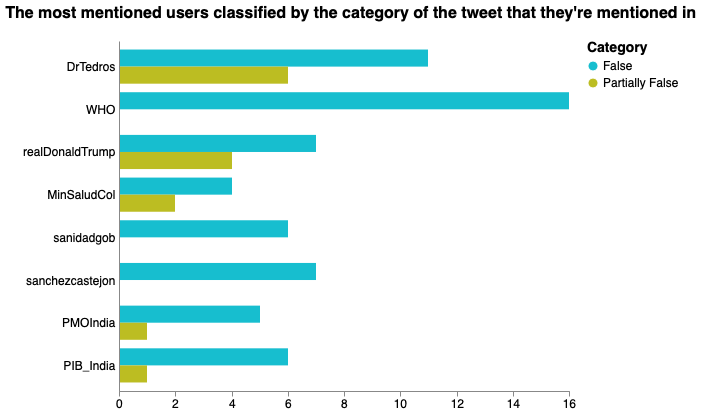

### [Open the Chart in the Vega Editor](https://vega.github.io/editor/#/url/vega/N4IgJAzgxgFgpgWwIYgFwhgF0wBwqgegIDc4BzJAOjIEtMYBXAI0poHsDp5kTykSArJQBWENgDsQAGhAATONABONHJnaT0AFXgACBGwiY9ccWolxZOhhDiKIOqABskECDQBmNCzqYBPHfRwDkiY5GyK-mzuAbqYAO5wcEb0ITFwvgDkikEIJmbi3jSSMnE0svRoACwCAAwy8DRkWGgAzLUyOEiyskVkaAIyapiOcGigoQAemGgg2jkGRrmm6t7WtvZOLm6e3n5pwaFk4ZHRgQEJSTGpgZnZxsvmlkXSIO4SmADKNABeo6gAjAA2GRRdw2aaoABMNQAvjJZCEUKgANqgcRIXIzTBIJgjF7EJCOBgKNCokAAWTyK1kAH0AKo2RTo3IQGYAdQAEgB5NkABQASlyXgAxQk2VoyXlIRRqQmOfyixzi1B1EBQNgMUytOGgSkPAq0hm2Zkk9CcrkfACiAEFBSKxX9IZLpbLHPKdIrlar1ZqIZCdRSqY96YyTayzdyaZaGIo2DhRjJPY7nTKaHKFQ60N6NVqoQG9fkLCHjRjTSBOjA2HFK-alcmQFLU+mPZmVTIfbn-VJdUGDcWmaXwyBzZbyXbE62nQ2XWm3Rm61n2zm-fne0WjQOWezudbheOQEm0FPG673Ye22rl0fV-r16HBzMACKKTQWWOsicLgH-FOn+fK4FL19NB-gAdhvQtDXvLd0HJTUPjgKAAGEJHcWtlWPGdm3PbNgLzbtA1vKCSxgkAkIAIQ+AA5OA4g-A9Wx-acmznFsv1w3N-gg6l+zDbchU-ZUgV-Wcz1bDiISBbjgw3PitDgZxxAodFNDYBFfHQv4mJPUT-z+CSQOkvtZIfdBrS5JDNKqETsPEpc8MqIy7xIssqMaLBHCKBMGK-TCWLE9j7M7JziM3MsACkGGEBgkJgJAlOtcjLMErSbNYnCgskkLeNMkBEuSnyhLSgKvUywyCILHiTNIgBpGhlE+NhkBoXwUBSkDir0xcgM47LqrLcjwt5SpySQOLFBcLAJqsgFOrY0qeqyiq11CuSKQYBAmCQGheTYTyoG888-L-eb6w7CFHOWoictIiaEAAay6DEZtVHTbK-JjzvKntrv6ocAHE2GIfkJEfOAPnitR6KOuaMsW68rsgm6y2yQlHwkQlZE0RQNpwGbQNh1tKjK78+ugiKAEUGBoEZocYwnAvhgEyZcocaqQMgGGxOCbFIcQaBm7SsPSuyma4xGqvJoc6SQpCaS5dxPCgWdBYZhavuZiWZKlmZxCYQxiFV5iTrhjXxZ+pG-t1zBiAYZSESNt6RcZs2WbCodmCgG27fih32tm43dNO7rXa14ydfQD5kBlSFKk0Yg6XttrCtSwP3vVq9NYtyXWZmGqTAKeguX0dFHeFkr9JJ83CMtiOQGfV9ZHfF61crpnYTD5z3ZmWLlEMNheRgCbGRbtPnaKsW3bWshsjIe6FPlaxk5hseK5DzOu2z7Xc-QJuEWIMoIAxLoBf9oX-K6i9Q638Od4bABJcjRS92LEPumaWlb9e8JaKfctfRSykkBIXJAJFOHVV6XwMlnGuOdu7oCpl4WM1oGA9EwOENMZcL7ByvpnaulVt7wJADROiuRQiKGfpgOmH0v64LwvglayMhyEncLYeQ3wZrHSDqbDef9SKINMApJA-IaBQGlLINgWCTai2vrAwha1nyWmUFAcicopHcJkXgvhZYkLHwmpaEYXtwiEk4bQ6Bm85G3yIeSIoEMiSyBQo4GaxNIE4KnBrQE2ihzCjYBMEh1DlQuKdmvAOGsBBeJmDYdEEjFD6HQcvemrieH0IibBWxhJUGONHsEqBJMO43y7mtOMYgEABLbjknBn0tGd1Wrlf6SAD7iH8U1dR6c26yIIVYta+8yhbS5jQQwSAACOaEz5mKrqkkAAAtBgjhkBIQYFATUzAEk0KSZolJNSmEzBseIZWJhlYuBQq08e7TqkFNqaRUpAy1KYLGesl25zLGFNytaRQjTZD52EMoOIJj-afweRnH+kyCjVg2vFOg0o0zFHAReCp54qmbIuds9AB0m6iJpJI+58KNm9S2VbdA99xBvAgL4CANJ-ofE0FRE5IToEMN+nXI+-MESyCOEwGagEcWPLwp4-FdcPhxhgF4GkbIaZbmxeXXJk9+V31fGwepihDmWjIHAVZE9uVArxciglDZHwcjINMf2XC2kQI1r-WVRDwrhAROIEGCIykQM1anDWFjOkvNIvfAk4hHwMCGcSWll93GZwtTquuo0GpsGtEwCRgacH0smbyck5FGDYhhQi8ZMqw132ZbAOA3wxGGDgMICQ+NM0a3Apata-0aBrBwPGFCgj76aDjck7VzzLllmIBIeQigRi+BMK23FS1s1EIWWImgW1slSsqRMqtuU6rKzdFENg79-avRnRmrNHaUUgGQBQZQQNbBYthRu7BW6OmMN1RyRAtz3DWHUNO89iTL2Mrvs+R8EKFKAzdPFIdazXWTMtHsooSAACclR-1apHTu3VdJ+akDsGwMDoEag4A0sa8tvD52kQXtKTmx6oNnKRbBuuTcaThTVeIciBh1SmMBcR4KOGyylJwEqGkMbT6wvPtInl7b3WdqHORlI3REjOKww5SZj5-q8hpOSXkRHv78avXXHxbBMC+BpDeronkCiOoDs6pTMGBO7rsag8i1oFOSufXx4zKn32KE-fzb9e1FJPt49BrMkzEFzIUHBfmim6HKbfUQ1Vhh1A0nVanQzQW7MhbWhZ3ksZGmHMCwm5jzDXAYhwHtURh1JwSaY6OhR1h7psAjWVg+yF-ruY0QBp5JndVEuUFFp1m7h3fVI3fOkbJVFsvWLV01UISZuvs0Qnro0ehiHTaLGLwa8Kjfi7lKiSFrS7jYOprabpBunLNQ1sba0mCNFCDNxmMXEXBdrnfcKAAZSkIw9mVlOxq9rtnOuNbrkSzmIQksmCPjtkJF24tXaIf9BgIRECEiQIDDl67aFA-ewd3K98mC2Duae+Hc7iu5W+6EZAzgaRsqQFAAHl8EcwI+3fe+SFLQAA0wcQ-x61uFr2J6vpB2tXRyB1QKH+i2uHDG9skcp2OzQNJyK2DIIYWMCBSezu3SLhRigbHz35K1Z75TWcuv20tq53r56KHupWUgcuL06458t9Toi0zkvvpSj4aWsddaIbyfVhrTcdZVFJxQNaMTIGwHALjW6Yvpex6RS0CAbnD3g2UFwjuFdI9IrsszsgGehHoyHkbkypnsGptaeP7O4FrWsKC-TPG6ueYp4nsskNRHhBxqoR91mPOMeB0X3K1q4DkTKIO5vFfW+I912WfkJg4BgyVfdKJBfzft9IioTooQnF96G6H53a0ICMHus4HARR7oMGn8L6vQ4b0TA5hIck98D+Xdn2WdU4hrU2HJMKCaeyT3B610ZwfFvSLCBoAgBAvg90f+uQS+3GhWbe8iuUHIN29Si+oB7+NmleDK3+ZYRQbwsSIQoiSASAaqRqYBgusWX+N+AMj4mgDOigPQwCNAB88BiSmeCeQ+Q41oGIzBsgkeJ4GG+B9BhekBpESaXIRKlBM0AwBB5OfKYeZY1okenwcUMAV+EBXSuUSEruCkwq8hRBvBZYYMjgwqu0+0+Wvk4BCMEhTB5EvI-iGeH+hB+EJhMwUyiQFhy+u21hyBxBMw-ISAwgIQHw40yAN21BBhGERhNha+ryVEl+mGBB5iky9SXMGI9Sm0wqig6hVejBMwg0w02hahkR3B2Gth6A-Bgh6OcMuReE+SoRSebAq2FKbAERXBVh5Oi2KBQ4RQlB4g6IxAnBJRDRTuiuuUvIj8NIRRzOXKPRTMla+RIAAAalZrCias4eTqGhUWWPGIelNtiD0LQHgQgS3p-qkc0TMIDMQJaIhmXsEa4ZoUOFMaIkAeSFAPnO0czuXivr0UfjMBHjlgkIoGKikRcYoaRNaBvgMjAF8EpDADdvfFMZaL8ZMtQfFBYHMpYYgQPiEX0aRFMVyLTjSI2jPAoG-nQVYavmiWWD4UgHEPfpRuIEAeIGcVEa8WkbBIHhAK+IoMoErDCRljMDdsoPAOIE3F0QSciXsX8R6rfiEJgDGLIJCByZMf4d8NibyekDKcsUOJ0DYBiAYNFKYAYMqcSUOKjI4OjOiI4FjDjAgHjALqUbmOUXqTshzAwPep5ENLqW8egAAWwLQCfBpvFCEHITkYSVnpyVoPAGDG4OjG6LQWslaQoaKUwR4TQMILYDSLyFMVMS6QySANNsYmBoCGBh7vVofhmV4crHydgRQcaOmQcegK0dCqXrpmuvUUKS4YmtkO4LyApOpnHk4XSvSVWSADdi4GoDSJWW4QUeSJaPQOwDvk8ecZMtGi1NaDALkLINaJ5EibscNkzJdJMeFMTvdKNCOZcTMKuZOjiNDrGAwBaY2RuUSa6a8PKEkMKnGNCoef8ZIe4MosAo+AVDsf3sKZMmyMKLMb+S8QwX2R8BZkcIbN2dKjwW+UOAYAMuQDGLHrIOuX+dYU0aOfXF5Bvo+IKgwN8DOXSWBdhTlvtMUUTMEduSqT3JRICB8KEKQOSK+bGU+I+P4p5Cbv6U2dEUGfXI+MMVxYEdFgGaRUeW6WwEgL4NYH6deRhbeRmU3ONBvgSBQXFBrtZCRRrDRbaegI4HGPmmwEwBNDEsOTBfGr2dheSPLI4BQB8ChOWbGKxYJjMGIn2lJUpApEHoKTeVZRJSAOgsgBADgMSL4PiVGWJXBWxegKKP-r4LuQAS5buuSGwByMKGyEMVRIJfnv7EElFZnLpXebyB8FyNCRZW2jGa5egApDSJ0AMslbqryFyI+KOBaI1XXAAJoaiaDMAiUSjaUhpSYyaAlHwIB6F5YdV3wDHkRDF8mUVnYFVlFzl0jaB7m2DSWBaNGTIgJcijTjSTSYDTQVUvp5G0XoAKxKxwBRCrVTUu4tSyWAytSRkva8X+XwW6zSgmBNwak9AfyY5bmTJWg0geElreWlwnVvb7HYWbDKCv6y6Q1IE7VcjkTRgQCPR-WI0okinVVkT-RIQo3-B3Wc7flQXE25Qgx5rk1J4bRbQ7S5YHT5mV42l3m7X7XSiHXHUY6DXLX8XWirVxRQAG6bWWlLXWmTI3aXlwA+KmB-pY3-n8UcjkhUyJDUZiby3Nn8WxQagaU+HUETTCDU06K+DKCOAeHIA4CVj-Y8V+VMxYUBVSizLswUCYga2KV9l0gOVbWBmTEoS+jhXuA3a5Xc3nbvUxXTHCg0wqBU1u1h241TI-XEAGzlY1RG1DiuDiCRbJGx3iUfXoDCrICy1HYQC-Jp0zBDRURdB+zyWgXRW43U5jitU3Ych1EgXOHu3WWDHDFl3oCe0-mzZi0Qgs0Znb7MD7TwCEgVA5110pVIDfDfB7QmA0CRSeQRVBE81FbnWBV0BsCE4KQUASIAAckG09M+AVNUvgYMqgUQloaFp9hZfZzKTQDSNAKlclbdPZud4dvImg98NIjhNd7dcdu62QoVuIoiPdIA5ESUwoku1gbIYo79vlClwDuq0SiQCAcU-q-VBmg9Ghed9cZJmdADH9sFZ9BD6IrUCIMYOADZpDllX9uNld8giAbZHNsAxF0Z+D4d1oRF3wHwA6d9gDn9M9uqEMCAftBlmluDb1jDu6HIVo-h3FcxwR9tBDE0XMzKXhvggIRN991+AVagcSMAmmnM-+kDD+Xezg3w2D3w-dkVsjojAqVG2M31ODzxQDcjuqIisAN2VYEQkDbIyaHFtEtJXD0NAV20cNlBzw+jVVKVVR1oNRrdA9jjmcw9fZSioiqk5FkD1ojxSoUQ98LFcT3DuN4+cAW+VY7js5-FjFcApAwoj4wd9DlVZTpmvsE0UcdAMAPiEwkDC9TUNI1g6FtdZ1elZESEK2lo-I-OwjZDD92FpJuQiAlQoELQazLQNQAgkDXq8Uvq2DTNKJGT1lDTRImAuitsYgZARIkDbkqqLWRxeTNJCgNIH5kD32FBaYysNB-1G9EISxEzEMLKXQSEd2kDmgvsEgHhpAJgnDeDETBD+Tva02UA7gsO8zDDTjd8vJh6boAR9U8LaTizAVXI1oVENKotTZ5OONs9SkUON2qdpTiL4dI+OANGTAfg-IslkDEaaYqiqYMua9olxLBjBD+cc48UBQehSokD9TfMdi3wqOigZAejmLbTLLuN884NUuH51MVCeTXs6g-iu5-TzLtLuqRwJpXgR8KF0jHjIj5D4dcQwgUwJ96rnuFrqmviJDqTttGsJzAVJaMA4gsYyrVCfTkDTmHwYijSwrbWor8Tuq7g8oEApt8Uj09rtTkxzVmgntRzR4PtW9yhcEm020E1jNNtKDdtkyLgXQVY20bgUbGMJp4U2MuM4U2dHrUNXrd8CDcyLolIEwdevLQJalGIkILQJT3bSN-FUxLgldw8f+GldzQMM4YTCLvbRCXABQPefa11LKBboSTruNNiUAYb7ACAj4jQCg2xyDQ221-Fn6D06u8suQFAR7NLkyHICjTzVbYzC2kydIbk4g3d5rkyVDDSoQXhG+pQELnhrRtgqiZAH74H-F3aEwJafMJIaHkxGHNIOHM72NQNteNIiU1oDl1oN2kDXIMofANI3TU9RHCtkxJcg5aObA-IvLiQiglN7AkDGH4gVuhy5KhHrTnrkywgSooQ5AkDua8A3w8gjgBpoznjgG-F1qKrcATADAp+8gUbZQSCo0Ay6CkDu0syRQ0I-w0puHW9vIktEi6NApDj-rJ7u6wo8oIiva-04UHzSAsybAAyNIL1IrrnJLBDHh2DjgiqygEiz+kDkebox6is1uCkkD9SUAysbA5EkD6obouiMoEgu5moNT-z7TuqSEtgpA-nfipatnEz9SBlDAIMagELyi90nQoEOz9Xd5VE5tlt7gd7Ln1b2LRCR1z5YijgHGbAznr1YXYr4dNaIwVCxXemgMeTsHRQNANU2tfVs39Y4Taj4dBNUx98ITdE5EvgF+OXPXGZ5F1uXQkO6KQj4nPbc5vmsevIsmkDqORwHRNMzgysG7ib5XdcHZ8Y3woVtg2IwP83SbZG9ankoyIdYxo3a0d+Rw-ccrM35IyA6KFAIXCbcPoPd8lXR8iguiJpx6WbZXmru6y57AagJOt3fZ1o9Ui+9zaORLxPdPuq5I1KVENWLP2F-0BlbI4QJpkDHME093lbzHmtkx98CIXIPQ9LkDUyyzEAmo3PI3bn3j20zgKvvQOvAHC3uNjto02I2+uzOMEwe0oEh9kDseMoh9gICXdA+6xluzSksXFGxO2DsPuv4X4d8g43dApeHz1g2ADSu9nkyAdznVRxCyTU8bMjPPW7a0lYCIZWmAGLr3s7kxCk8gQnXsMYENKP1LqDdcSqobJ8qfZ6G5X7-FR8hLvwG+vLXIHIcmEgVrC1c3QfZvu6UACAsgMAef97anevdcE9jg9AUF-nkDNUNU8mXMBt0lJvk-wfp70BYqAeXb+fxHzfOW2QoCHIcnGpZ+xAQ3-fpv8Pd8ke4gM-9A4gHCwvAVVEUy2JUfTUgft-JPRCkdX-HJi5DCgWmE-R1lv3p5FAn+MAZWBCw0pwAkIdAXwBWxwYN8MKTfSYiImUhsBLQHwCmIEwl6yBVEVJXLnQB+B5BoK8vDuu-0wISByIqMakn0Df7itY48cVThAM3oTMS0ZfXejgGUDq5HokDJpkk3JAgIfKw3P-rz3DSd8aQDxVqOJlp5FUMy8g6HEeiZDhBf+m-QfrqnNCqDhCwRcJPxVdx0htCARAJiwPDofAcs88EKusAkCAwmW1AqvnfFgbGl1QldLLsaV5bxRiQzgArksA36cC7+RCSsBNEhDddnBXjOuOIF8BGMxOBWWnkd1xo9JZA6ILaKyVT4OsFmOguuEARfwb4ySUvEYMOzEAaUXylg3GtaCMTK4ugcUb1Hk1jx2pGuzgJoLYAsbwlAYakOUESkMA-cfgkDd8BpRxBbR9M8xYIcYS3rohsgfJO6LciPbQJA2BDCXH2iKBUQt8n7FwUQmjQKQCu2IBQZUN3SS10Q1oedlTy0ETDpBd8G5t9RxBsAiKkDBEJzB3oEhzhuXDEDTDYB34pskDaKPFDDbQ812KrSBpaBCpFADAwiOvpA1+RAklI6CcQDlj6GHDdUVEYTjbgK7E49okDeeJ5G+CxI5OhyBGlELR4d5wU8JMVPiwxAXCchIQ7pLenPbE5fAQnOIJAyUZwABycQMDsSKn7XYkIzTI6oOSyHZs7OEKe6IfTVYH8WOW9UULLQgDIAaQYGAQG7ypaN8th6PJqFtDUB5A4AkICUX6wwFqj-4DAVqJC2kboCH2hovgjGCQByYvAhPFnJX2iF3wEIUAXaOaWuqbCnRRCaOOqBxhHZ6+ANEkeiWAr6ipBSwnhgOxni70yq1oKzpEO6KOigxZYMQL4HcBKc4ad+T0UmKHCo4QgygJVohFsATRx+i1RMTyKIS0cjs2IW+uDgoIBjRClolYgzTTCsJe0fybkZAKarjkPgIYyQdoNpH9FmxNopAb82RF1wkIwoMljdw7G5C748mYUMmX+hccxx1w9QUJxCqQMDKW0NgApCSDKIhRtPDPrlCJCHIhO6-GnuEyPFXJHuIwLyID3RoHjLxknQLgdDiiuAFIhdC8Zu0mQecX6bAa9kJzIGxgjgEqGcQONIjwAah0AM8kl337gCaR--NaM-DfEgwS01IrFuWLWh8toJjgKZDBKCEISrhRCGkJHmyBpgmA9eLsmBMQl1IgYbIYVJgFyBwS+xlwq8TokYAgFVIrJBISxMIlsShwmnVVHs3EBcgwR5fSUQry3op5KeEgm-v2JokAkRgdHYFpCnqhoDAxmEnHBqEQwFAlgmAPcN7Rrb8UPy8UNFCoAMpZjNJpECXP5wJAMAyOSk9PCqINFejOcEgGwDTAgBTEZuHMHiQtFDquTcoPhMfIhB7wQB-owoFJrxIwmdiBUGSWQLfSahwAzW1EoiWtA5B0gk0uiHoK-wr6qjAppEbGMTnSDDMbY7vGkv5307-JgigLO8r1SFq2ACuhTL8SDzSlBTFAqiWABw2kbjDCJyQ3dFRHJZJNeQ1oTQFyBuzlVUp-EmYAfEeiGA4o90bIBt2FQb5+QoZJcgwCNyQMPCQJWQErz7g0B-g8Y+CTFNnHbt4owgFDHqOikatppBRDkJaGGZ0MTpt0yZFRAUbAYbmvsSBhyHBwJBZJoXAfuBLLCqohOkeMRDSFtZmch4CACNLsykIfBUESRGxBvi5oSSaBBDXwRNDniTRWoOAUCDZymmTJcgWAMaPFCPj2jshp04GcwnEDMB6hbgR-gROpkKSywe1D4GRw-I0BDmK470VtyLTZB1QI-XKejMbFDh4yjgXZFyNFkFSywgzDjGqmYn+TUeVkrQooCmQJBPI5II3BQLub3wLQZ-XmSTT5FqSahII4UMBjRFUSZZ2Y94rIAjSYAYGkDbvFURWSigMChk9TjuRtTxR7U1s0MfJK9xa0momoVCpNli6QNdER8EfO2Jtmqy2YvIGqHSBwAIhQg6E16fxRqiJzUBhMuObFOdHwAMCNJCNLAFzkBzAcYs48rP19alj8ptssyNXNCYxsvAeydSQ2NllMFG5dEDkDWUsn5yiE98K3ld1AF9yzpWEooJaDvxNQ++gMqQXdIpDvBQp6CQ9Ee3mxcC7yEwRQAR0HIcC+pb0hRptMjkZSaM5ZGrh820nGhEAeQAyc5LDGTIZ4h8RWV1KoEJi658cmYPfAQAv4aoGlH+lFOVllj+5SuS3pgDuJ7CTGkDbyi4FRx8k1Ij478fxWjgeAX8M8X4QoGsDYzqY3E+ASFI3wpokA90a-prkAVjzcoe+Y0o9C-lIBD6jvW+QsUrnoByEEQGoC0FzJlza5Lk+uRSChRSskAq5dwMznNH0KO5OyDUOSmxCKxSuT4-ii7IWRbR3Z8fOhZcPDG40XZI+Pku0KNn-x4AA5X9NqSvJ5zSFpEOaXFHcAtAuu10uSaxMmQ8xsQQyDBpSF+StctFpEI+MKi2ijRPI90HMqBAS7SgxEfzcJrVIzJIQ+4soQCS4vYlvx-E7zf9oHP6m6p4R4VKIAl1mSVg1gcrX0TvnclwQdC8C1qfPPZlyY0lYiqRQgt9r1MHmgIWhUTMQWiJ4AIwc5t8CQY3SJO-FSWpgG+AtdMABQJWbPMDnzyOy4gBAKVkCxryAWUmPdh4Q1Cz9WRsyBgByC2By1alkxNkOSzoHGlyCL3F6W0smIcw9MOnb4EyO2l18pkloMXFREtBsgHcSisnAwvrgLjPpXkAbHEsuEJKYhDSQkJDKq6TVXle8-iqBDmruBxcLU9PjYtEQXsmo17MLEQu6jhMVFu6XkMwHbKaKVlW9T2m8iSqRL9SFM2mP-kEW0JxlkwiZtJh7mFCiREkx9pMWfDWhR+GIVRFOluXy4uFpK4Es9CZUasEVaDKsJOQgAR9sVx5CiVzEHjShkAHIEqqPJpkzBIYEgdgJzCYV+T+l1i-is-kQgHRsYdeAysoElWsyhwiCBAFxImg7RnAFjAcmW3EDTtDFUq9AD6RMrpCIGAqwlPhXvjZBFI2y1pW9y1p0gu+jlZ6R6oL5b15yvgRcsuRPILC8kkyHoKFWxBeDyQMBPJptFmSmS4Ag0m5WiomYurgSbPCnuEDwCL8qIWmAwDvit55NUY8GKNKyRoCn4AljqvdAYDEDpzdlW9NNkARcBWd2FViviVJgXEE001Vq3VTMDpA1QwY7ga1GX1jk7LPVkxKQrYGqFdB2ysgRtVOq3pmMkAEwP7pHLAxURGw9pEWumrvLKw1AvwUwMQHnixDmZGcyYjVCSixQpWCkSxUqq7WZzRw-IP+voNrU1R3pNIK2sWonVfgAUQSyZPnFKQ2j31+6jMh4R6BVFyBx64UJasnUBqGu8AbAJxzr6H1FRgwuvs1EKGRzvyYGleId0mSUKUKcAB9UTyBkDr0AN6X4EAW-Q0BKFR2SBsB2pyWhhQ+GxIYRpkWMDeg-iGqJNP7VtTSI6CCREJyZ4248mWpbEHpKmI3Z7GnalmYJrLD-Qpi1of4NZ3S4qbmUkKWFWnwo2KahwKeJFeAzESgi-F1rdBDpwsm1qU84csoHkziG70PgwoQ2eBr7LsphAmXClQhsP6TFGKcYciAFyXWIa7ykUWWpaAmAMcIUrKCxr6BtHha5WtgSDewDAw1B3hRdFrIqvI1zzJkEIoAqHyIqWhwoymp3jGD3xuh98tay0HSGxJNRI8rgJvHlM4XvyzIjxQZIcnkwdD+YB0RZcpA7WPqFN88iNK1AQA3pd2oKvTfPJnX7iwY-0CaN8BnlZaBlxM32JTOFETMkIXfN5KDNCDUx7RQiiuSIvQBHA7AZWcbdlsVqwNe0mqpSf7I4UWjDtIAQkMlLrb2J0Ee2jSUAtyjCARl9W1bYeMmTuU2Ak7d1gJvnmPQ+0GpF+d5qlETNhUCIOymwBgEQtntEAfCgo0X5XyqSCgV9aWrtGCojpqGUCP8BqBkbdN52yYr0Fi4mUY+OMAYbWqakGApiG1FTvTopa7yFN7yu+FAHaImU-V69TjZMWgZIRxefad1fzoRac6iELo3htKB1X6b3iTEzGCDCOw0k6ujW+7VwqlAv8aAPiTUKnIa2g7E08UebRit5abSEgqqXXXyXPnEATKcnRCE1GIDM9XN2FXwVr1ahG5oFF6ptUC2PimA4o-AnEIwD62LblVkxZ+Npw2x87+tl6reltFfz8CgYRQVLLWuuJHwttVIcSdDsknrbnAqCNMH4wh7Oy1U17Ydjpqpmx6JmCAKACXVVrpAgtPmrekMp+3R64VCLLlXXGkzKAFAIbAhXLrB19xe94gKHXduEVcL-oXIezmql7QJbxASEZwGpMq5KgAZbekhdaopCKBkWvgKiEcH70A6cAyAQuWBAS0B4ByJY+TZXrvKOBf82QdUkqhaUX6fdd5ZuQcjgCjQKA82goJHIXhL7HAv2VwJA3iFiBPA81Ale3K4U1lMCoE1+U1s+0QTMAmgC4Aaw5WnU4DZYLwgUF-SdA+45lF3QFXCgKNeQPq9HbWqial4ntMoBvf+QAC6gwAoegVlwohxgvgeMDMDeCS8ZAOwE0uGGRDgIv41BgMBplYPoBPAs-VFclP4EzBU5G0SgOdB0AAA+AALw6BAQOgAAGRqGdA0hhALIeXA6AAAPMochDSkYQAh2g5mUm6mgyQJoGYGSksMvAhDfwEAPHqEYSJmoGgUAKnKRCBUcQeITg3aLQqMk0icIEACgqcMNAmgeBToN0F6BZhKAFiGw+gAmA4TvIjhmYLpkVkvA3D20Dw3IERBYhfD3kLg4EZACvCA0IRsIzMFKDlA5KF5a3agCOrEgZAvwZyg0ZxhwAZAXWv4I0bgABhEjl4LVQ4ZYNOGbUoGUAtkeeCoBPD+RxhYUZeDFGZg88DSBUfiiqoxgFh7gE4bESHBjgxOkABUYabrBuj7R0wzIDXVWHQAGCPIOkbgCDcXgKR2ww8cGA3EvgvwbqM4FRx-6q6sR1AC4k-3yB+mAcD4wpBlqfBdZAICxFcdzDOH1MQVe4-YaSNPGQAwJxwKCdeNaR-Q5hkYKDMXWkhmDwhzMr4E2hYjnjwwJw7oh2MWDXgAPNyntHCBZHTZ+QGadDywKgFYwcQKUDEaUj9AlwRIBAOIE5Oq8+gqAQ+u2E8g4Ab07kIeqSZGC0cW5EIQKnGHuNEmKJjgRirGHniOJ6T6AAAMSKxkepKYk2qfG7zwxUNRiBCibRPgnrOMp6Wu8HRMgRHI5h6OJPjxOBVhjMwKMZeXmMy51jAig6BCGmPYgCjuIbyP0f9NJAXgXpnAH4B2RvEYQIRg5GpD+CgBtRyRKYyAA0gZmHj6AOw09vmMBG4zwRhMzIDcBkBjSPBtEKWBmARHmgMgS8qnKcMuHqj9AAABQZA8zIwDIAAEp9j5hlI5WZAD9HERQxgky4ZeCVH86geSI1kaag5H1jXhtg8VLwILH0ASx-Y6cb3TShXTTBoc9WfQAZD6IH5FpBmcXMiHlz+xwYB6fQCCy8CSZ-ThmbTPrGszoAHM+WB1L+Gi+ixpUiEdrOBmLD+Z9ACOZkDjnNYIAQE6+YRPgWkTq50oxklGAhGJg0pbM1BeSP2GZAZR-SCEdENOIULgFgY-Sc-OS81zP5wYBtln4qB1jZZ7wegGABDARgqALQyEBkN6kpAOgDIJoGGMZBGL2hygEsbYsZA-apgbi7xcwswgNzCZswzCCAA/view)